In [ ]:
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy import expand_dims
from numpy.random import randint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

In [ ]:
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_005000.h5', cust, compile=False)
model_BtoA = load_model('g_model_BtoA_005000.h5', cust, compile=False)

In [ ]:

def load_image(filename, size=(256,256)):
    # load and resize the image
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # transform in a sample
    pixels = expand_dims(pixels, 0)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    return pixels

In [ ]:
image_src = load_image('/home/thebeeast/GAN_DATA/0/4500.jpg') #please enter the correct file path

In [ ]:
image_tar = model_AtoB.predict(image_src)

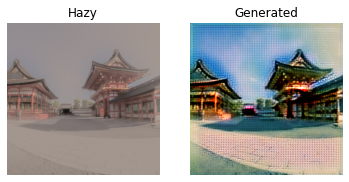

In [ ]:
images = vstack((image_src,image_tar))
titles = ['Hazy', 'Generated',]
# scale from [-1,1] to [0,1]
images = (images + 1) / 2.0
# plot images row by row
for i in range(len(images)):
    # define subplot
    pyplot.subplot(1, len(images), 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(images[i])
    # title
    pyplot.title(titles[i])
pyplot.show()